In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [8]:
toyota = pd.read_csv("ToyotaCorolla.csv",encoding = "ISO-8859-1")
cols_needed=["Price", "Age_08_04","KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
toyota=toyota[(cols_needed)]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
TC =pd.DataFrame(toyota)

In [10]:
TC =TC.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QT"})

In [11]:
TC.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [13]:
TC.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [14]:
TC.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


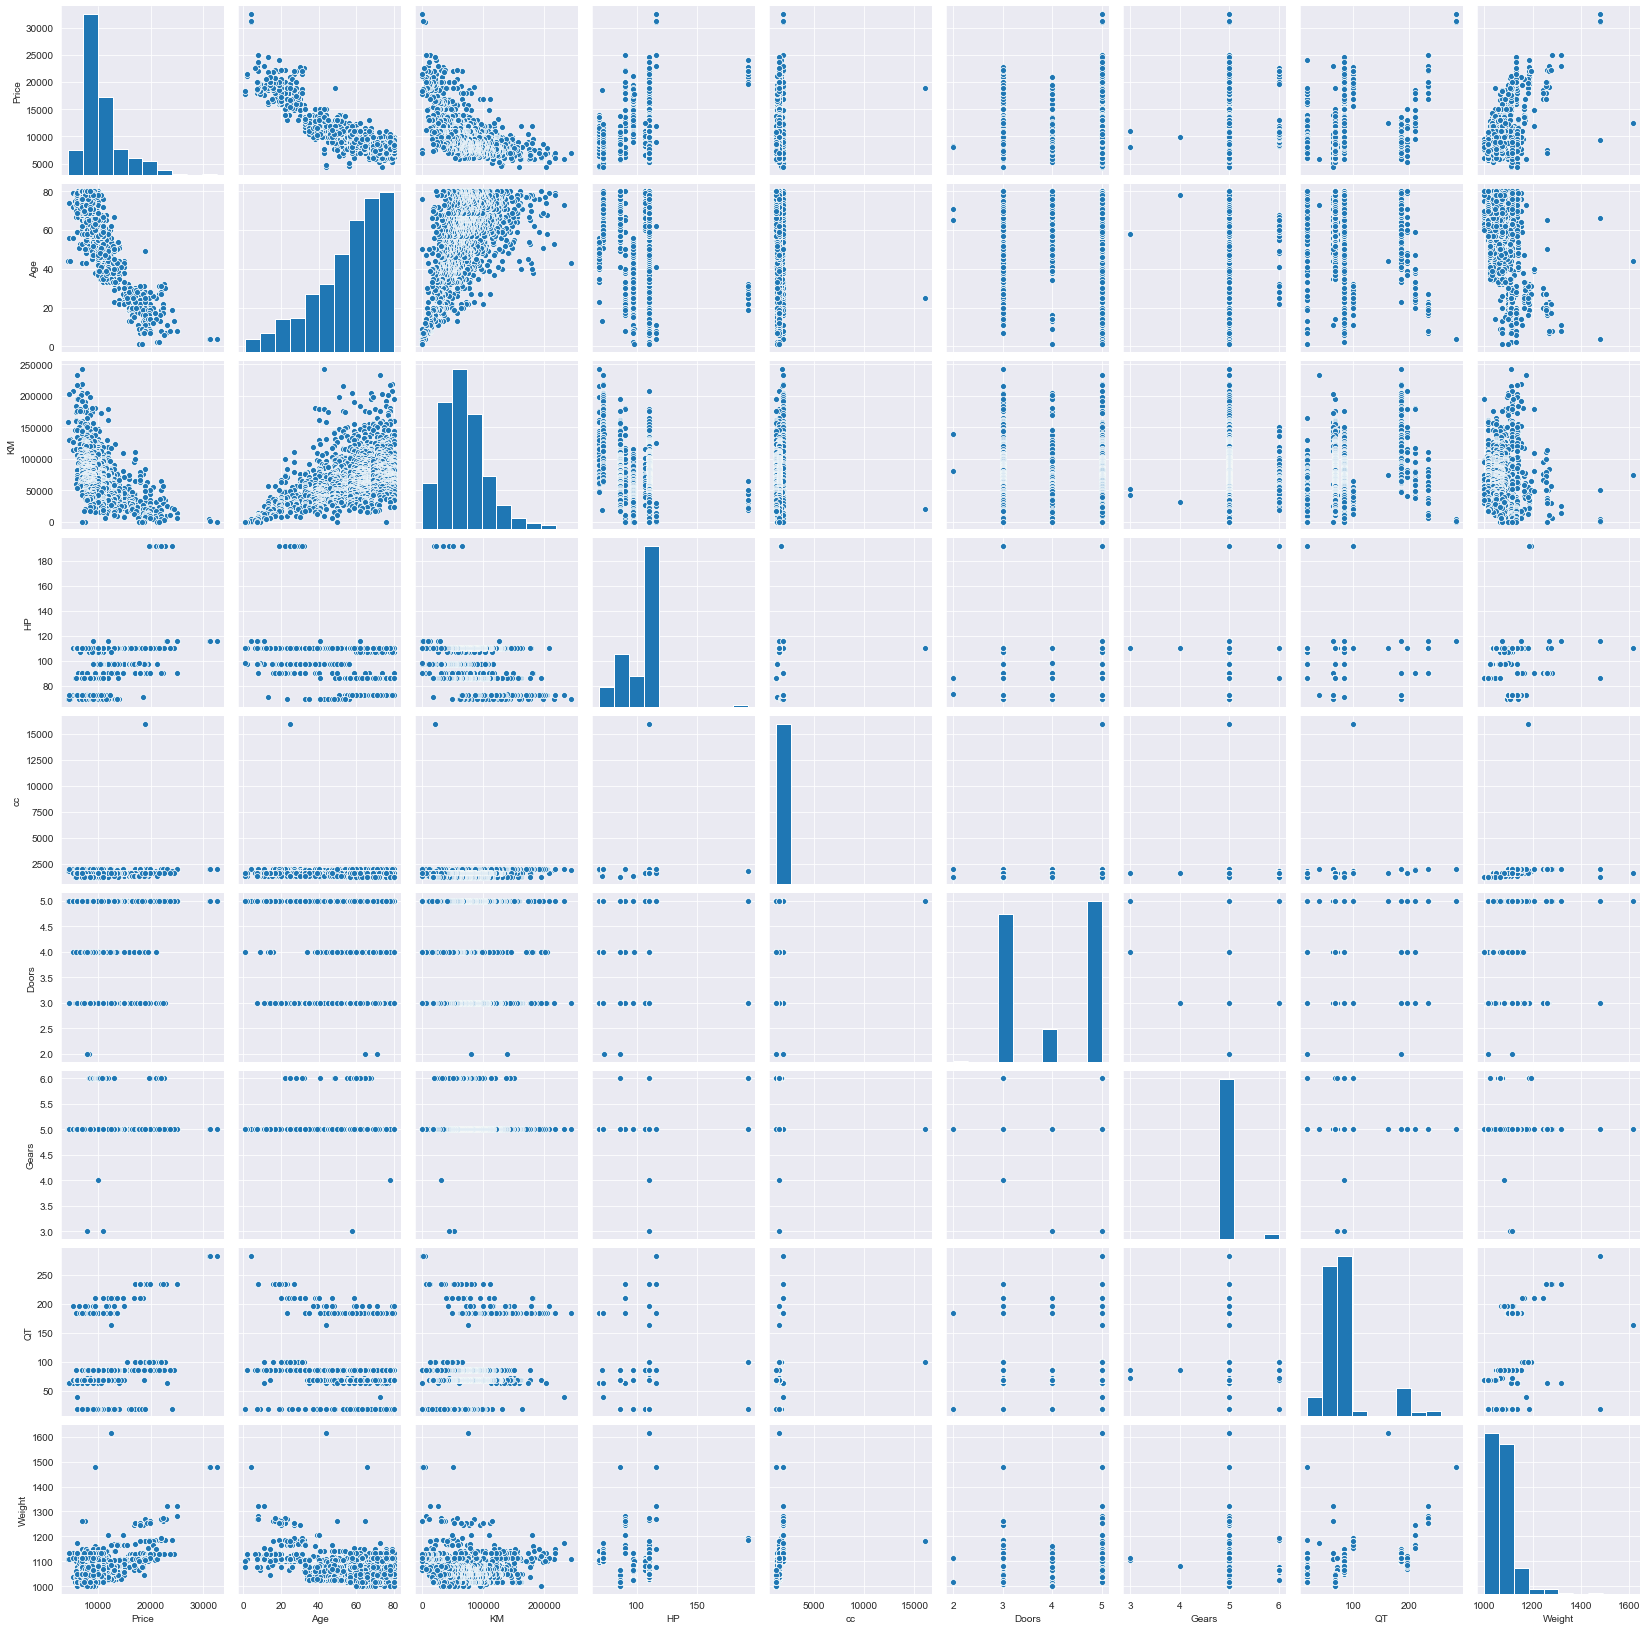

In [15]:
#format the plot background and scatterplots for all the variables
sns.set_style(style = 'darkgrid')
sns.pairplot(TC)

# preparing model

In [16]:
#regression model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data = TC).fit()

In [17]:
# coefficients 
print(model.params)
print(model.tvalues)
print(model.pvalues)

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64
Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64
Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [18]:
model.rsquared,model.rsquared_adj # rsquared values

(0.8637627463428192, 0.8629989775766963)

In [19]:
# summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:20:41   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# simple linear regression model


In [20]:
# preparing regression model for doors
model_d = smf.ols('Price~Doors',data = TC).fit()
# print coefficients 
print(model_d.params)
#print tvalues and p values
print(model_d.tvalues)
print(model_d.pvalues)

Intercept    7885.005835
Doors         705.558636
dtype: float64
Intercept    19.258097
Doors         7.141657
dtype: float64
Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [21]:
# preparing regression model for cc
model_cc = smf.ols('Price~cc',data = TC).fit()
# print coefficients
print(model_cc.params)
#print tvalues and pvalues
print(model_cc.tvalues)
print(model_cc.pvalues)

Intercept    9027.554784
cc              1.080168
dtype: float64
Intercept    24.694090
cc            4.824822
dtype: float64
Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [22]:
#preparing regression model for both Doors and cc
model_dc = smf.ols('Price~Doors+cc',data = TC).fit()
# print coefficients
print(model_dc.params)
#print tvalues and pvalues
print(model_dc.tvalues)
print(model_dc.pvalues)

Intercept    6509.421098
Doors         671.397311
cc              0.959740
dtype: float64
Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64
Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


# VIF values

In [23]:
rsq_a = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=TC).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_k = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=TC).fit().rsquared  
vif_k = 1/(1-rsq_k) 

rsq_h = smf.ols('HP~KM+Age+cc+Doors+Gears+QT+Weight',data=TC).fit().rsquared  
vif_h = 1/(1-rsq_h) 

rsq_c = smf.ols('cc~KM+HP+Age+Doors+Gears+QT+Weight',data=TC).fit().rsquared  
vif_c = 1/(1-rsq_c) 

rsq_d = smf.ols('Doors~KM+HP+cc+Age+Gears+QT+Weight',data=TC).fit().rsquared  
vif_d = 1/(1-rsq_d)

rsq_g = smf.ols('Gears~KM+HP+cc+Doors+Age+QT+Weight',data=TC).fit().rsquared  
vif_g = 1/(1-rsq_g) 

rsq_q = smf.ols('QT~KM+HP+cc+Doors+Gears+Age+Weight',data=TC).fit().rsquared  
vif_q = 1/(1-rsq_q) 

rsq_w = smf.ols('Weight~KM+HP+cc+Doors+Gears+QT+Age',data=TC).fit().rsquared  
vif_w = 1/(1-rsq_w) 

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#which ever variable has the highest VIF value that value we need to remove from equation


,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# residual analysis

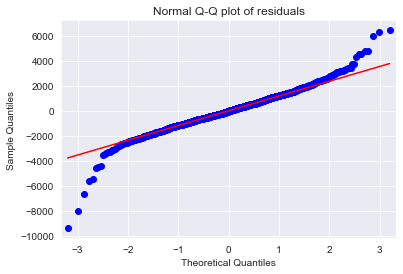

In [24]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line ='q') #qqplot 
plt.title("Normal Q-Q plot of residuals") 
plt.show()

In [25]:
list(np.where(model.resid > 4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

#  residual plot for homoscedasticity

In [26]:
# residual plot 
def get_standarized_values(vals):
    return(vals-vals.mean())/vals.std()

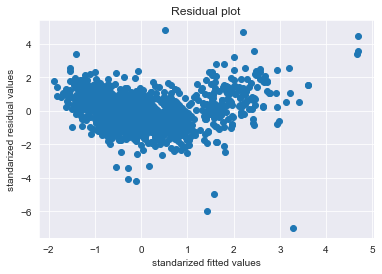

In [27]:
# scatter plot 
plt.scatter(get_standarized_values(model.fittedvalues),get_standarized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

# residual vs regressors

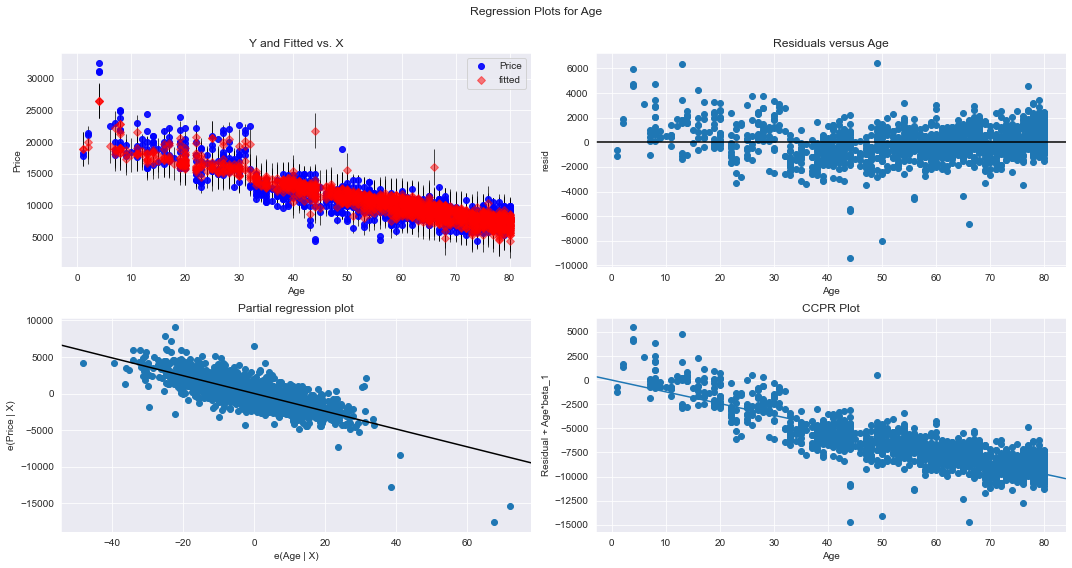

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age", fig=fig)
plt.show()

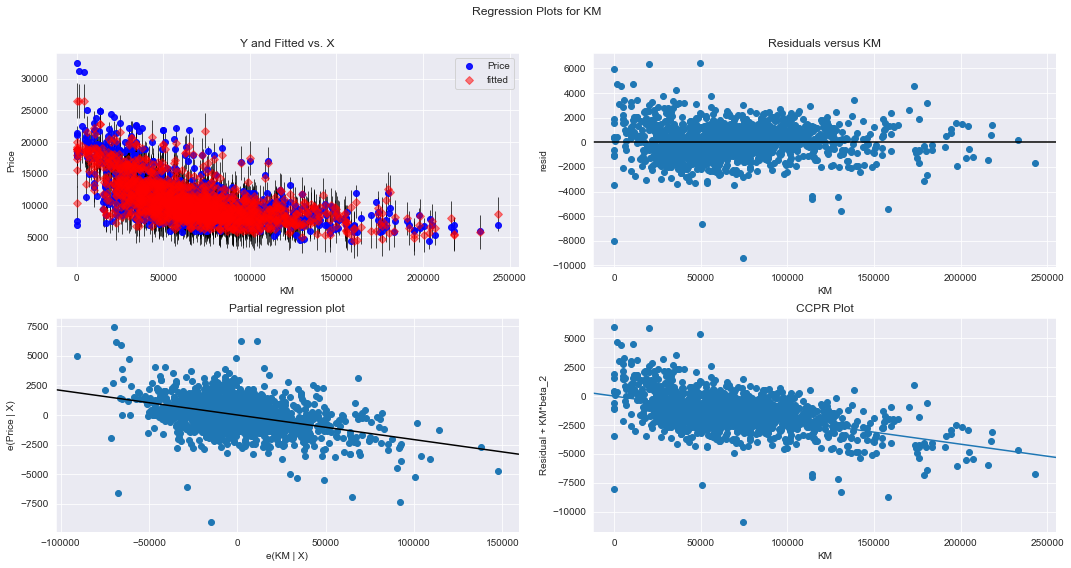

In [29]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

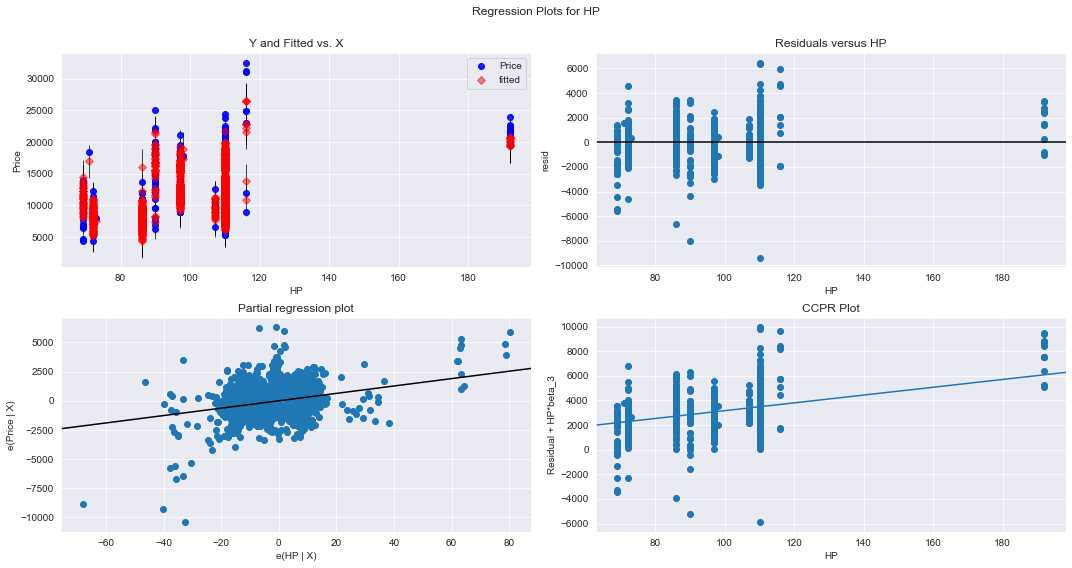

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig = fig)
plt.show()

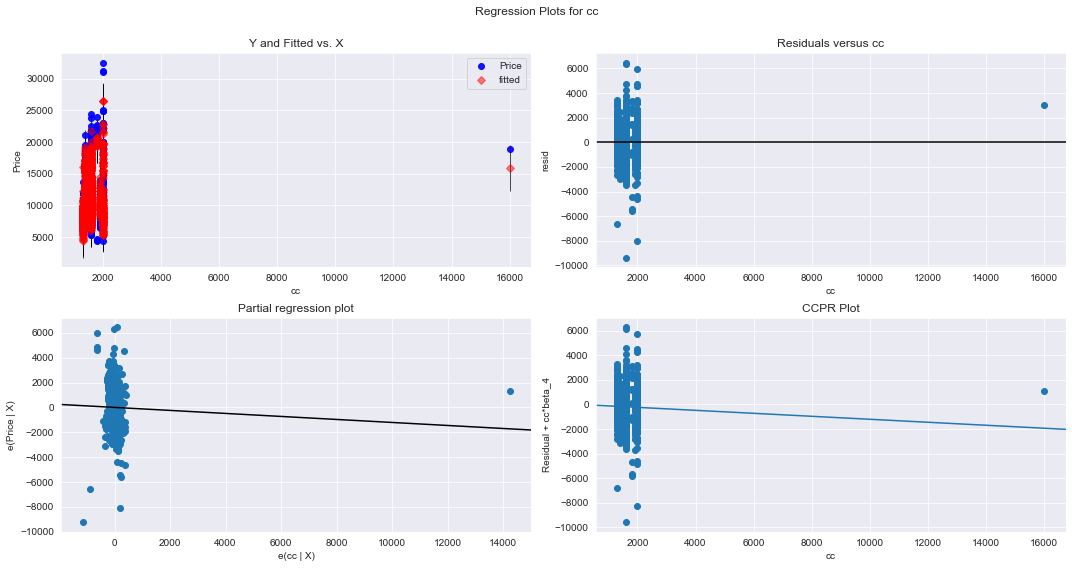

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

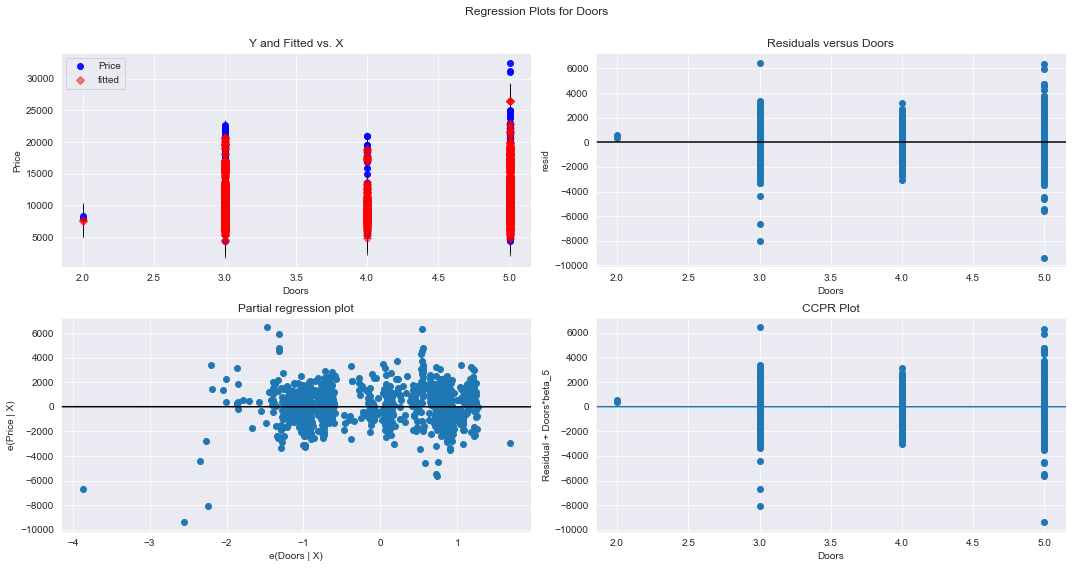

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

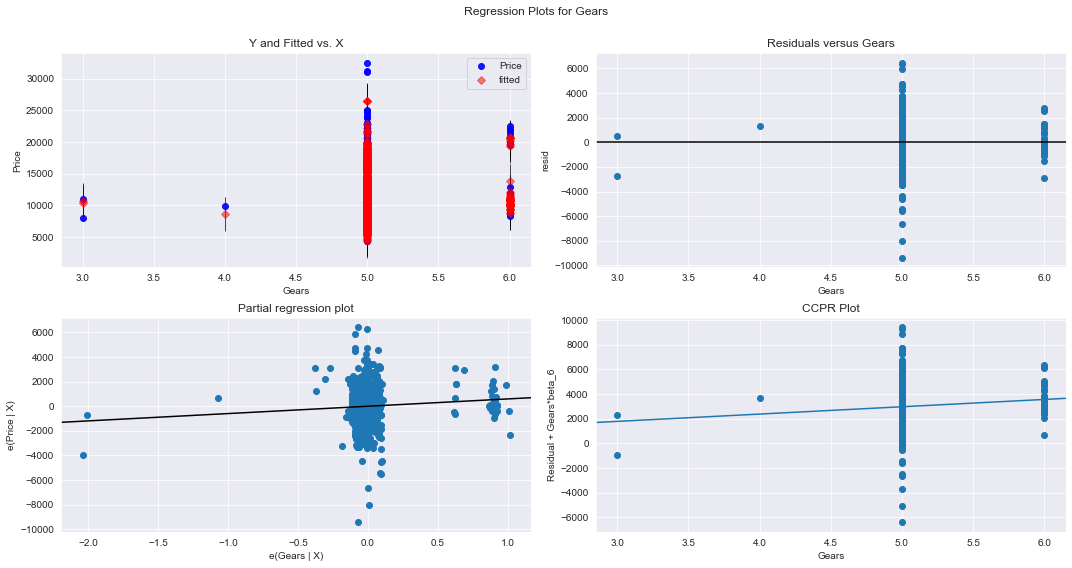

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

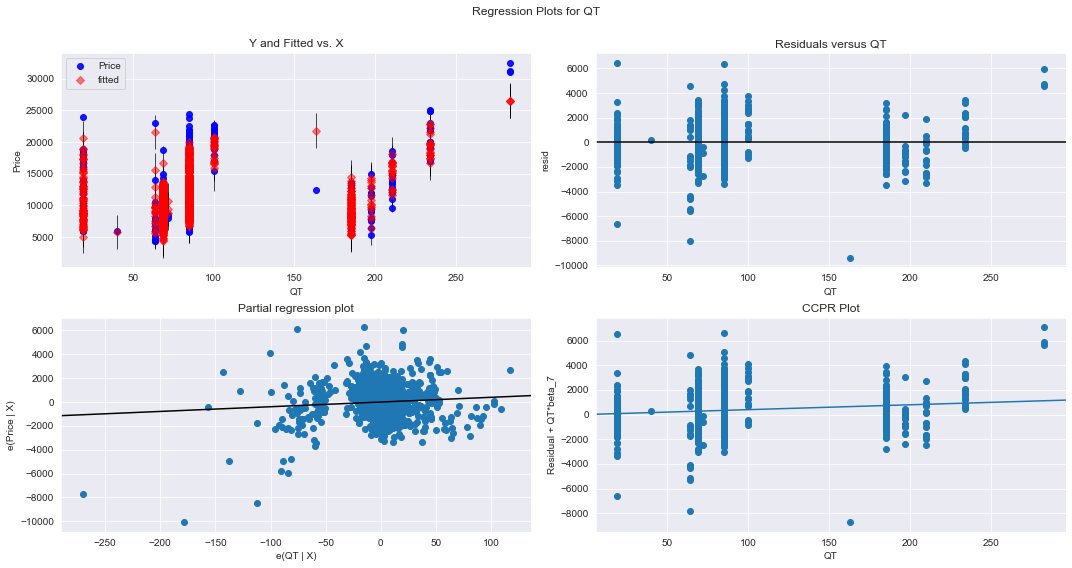

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

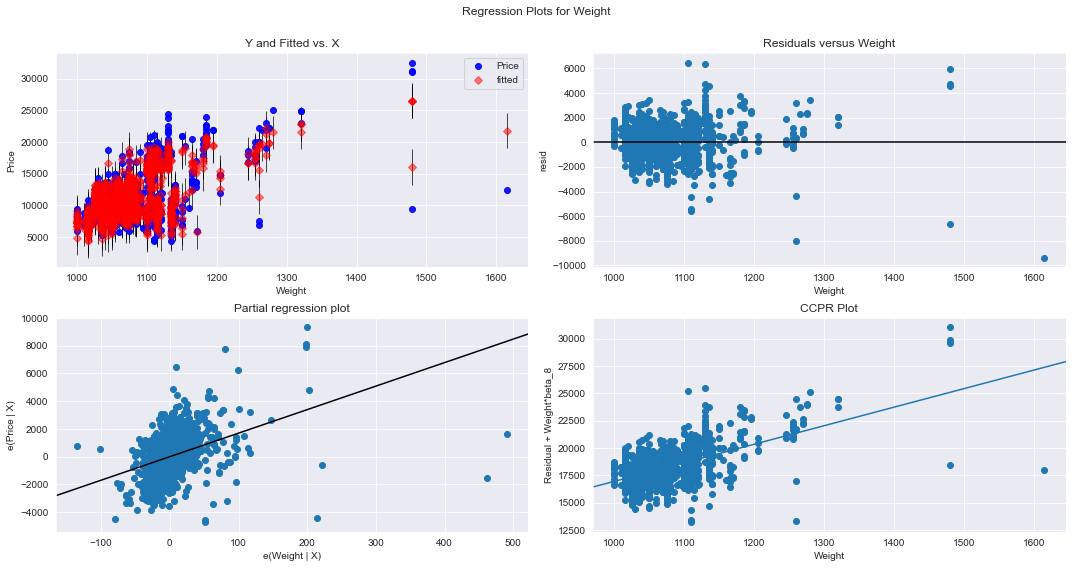

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# model deletion diagnostics

# detecting influencers/outliers

In [36]:
# cook's distance
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

<ipython-input-37-97f6869c7d19>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TC)),np.round(c,3))


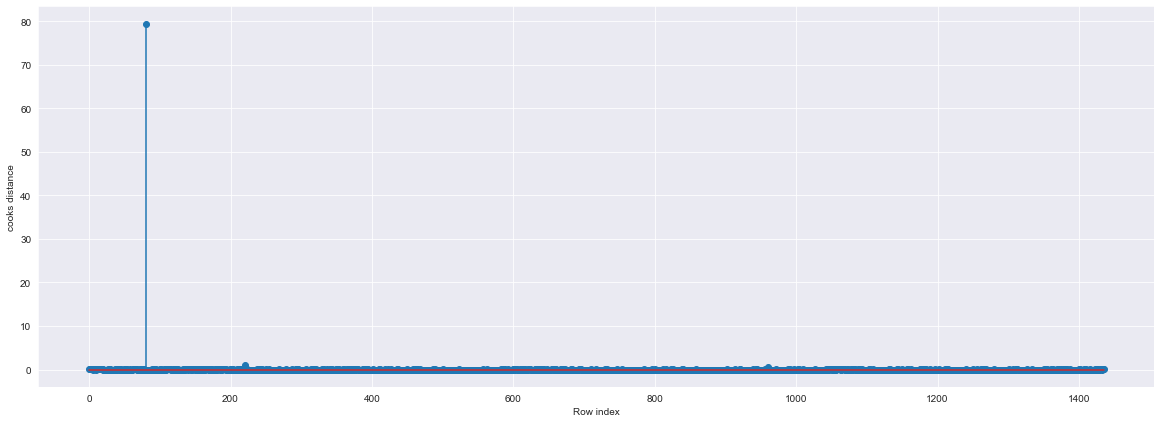

In [37]:
# plot the influencers values using stemplot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [38]:
# index and value of inflencers where c is more than .5
np.argmax(c),np.max(c)

(80, 79.52010624138055)

# high inflence points

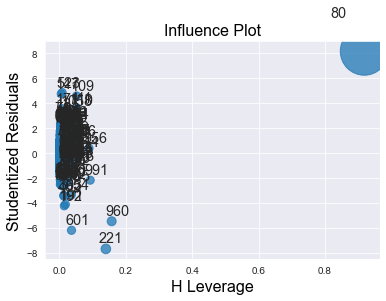

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [40]:
k = TC.shape[1]
n = TC.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff 

0.020891364902506964

In [41]:
TC[TC.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# improving model 


In [42]:
TC1 = TC.drop(TC.index[[80]],axis=0).reset_index()
TC1

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
TC1=TC1.drop(['index'],axis = 1)

In [44]:
TC1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Building model

In [46]:
#generate R2 value and AIC value
final_ml_TC = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=TC1).fit()
final_ml_TC.rsquared,final_ml_TC.aic 

(0.8693790488655819, 24687.28102432684)

In [47]:
# cook's distance 
model_influence_TC = final_ml_TC.get_influence()
(c_TC,_)=model_influence_TC.cooks_distance

<ipython-input-49-ff87ccf299b8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TC1)),np.round(c_TC,3))


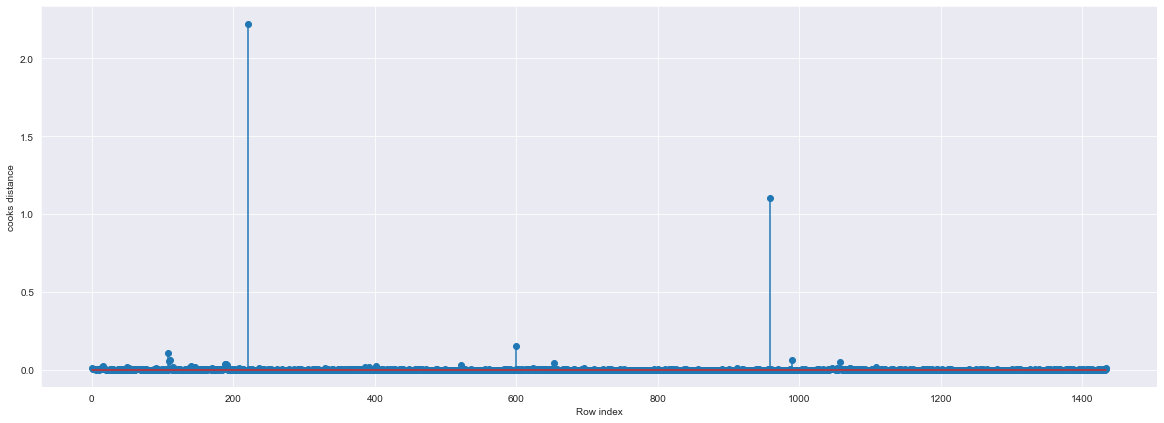

In [49]:
# stem plot
fig =plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC1)),np.round(c_TC,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [50]:
# index points
np.argmax(c_TC),np.max(c_TC)

(220, 2.2244611713001508)

In [51]:
# drop 220
TC2 = TC1.drop(TC1.index[[220]],axis=0)
TC3 = TC2.reset_index()
TC4 = TC3.drop(['index'],axis =1 )
TC4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [52]:
#  building model
final_ml_TC = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data =TC4).fit()

In [53]:
# check influencers
model_influence_TC = final_ml_TC.get_influence()
(c_TC,_) = model_influence_TC.cooks_distance

<ipython-input-54-0e2e1c13d7ed>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TC4)),np.round(c_TC,3))


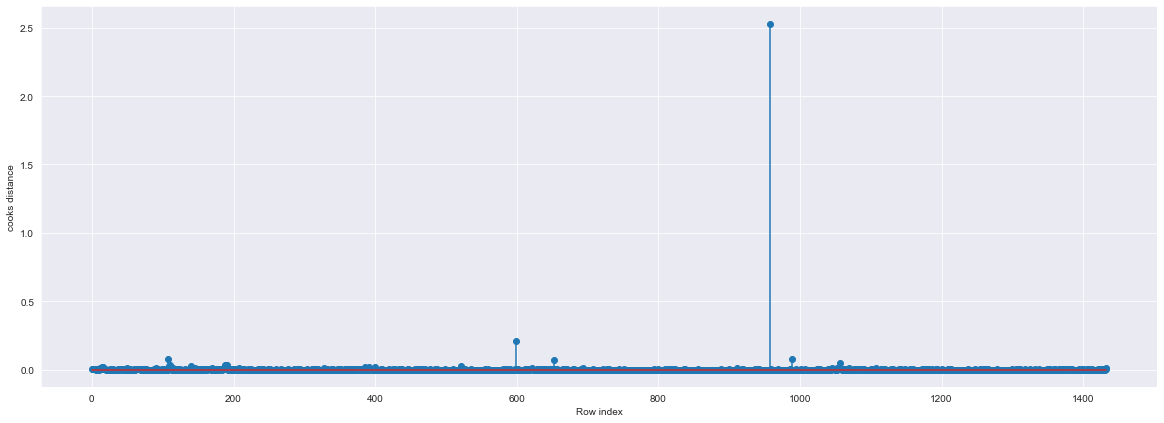

In [54]:
#stem plots
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC4)),np.round(c_TC,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [55]:
# index points
np.argmax(c_TC),np.max(c_TC)

(958, 2.5312566930233107)

In [56]:
# drop 958
TC5 = TC4.drop(TC4.index[[958]],axis=0)
TC6 = TC5.reset_index()
TC7 = TC6.drop(['index'],axis =1 )
TC7

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [57]:
# building  model
final_ml_TC = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data =TC7).fit()

In [58]:
# check influencers
model_influence_TC = final_ml_TC.get_influence()
(c_TC,_) = model_influence_TC.cooks_distance

<ipython-input-59-0e2e1c13d7ed>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(TC4)),np.round(c_TC,3))


ValueError: x and y must have same first dimension, but have shapes (1434,) and (1433,)

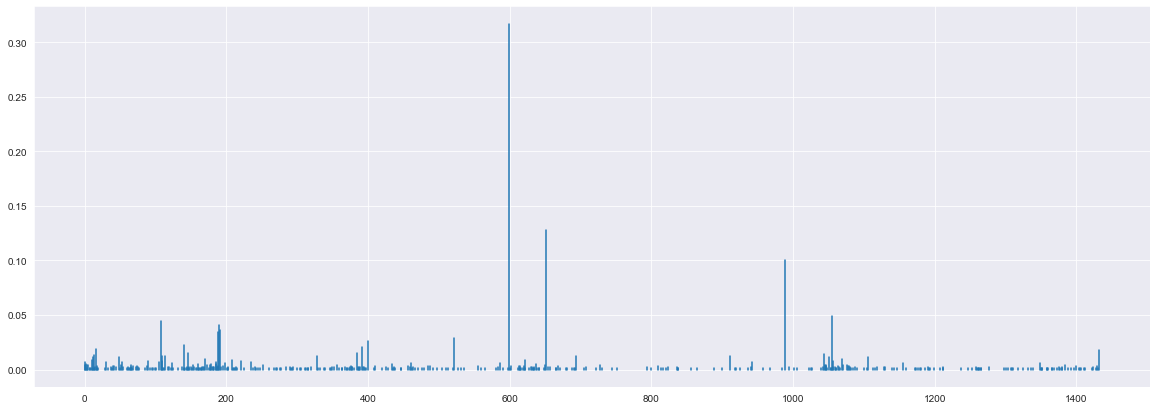

In [59]:
#stem plots
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC4)),np.round(c_TC,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [60]:
# index points
np.argmax(c_TC),np.max(c_TC)

(599, 0.3166131528144162)

since the value <1, we can stop the diagnostic process and finalize the model


In [61]:
# accuracy of the model
final_ml_TC = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data =TC7).fit()
final_ml_TC.rsquared,final_ml_TC.aic 

(0.8851845904421739, 24469.715205158594)

In [62]:
final_ml_TC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:53:49   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age         -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM            -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP            36.6084      2.745     13.334      0.000      31.223      41.994
cc            -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors       -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears        464.9839    180.976      2.569      0.010     109.975     819.993
QT             5.2134      1.371      3.802      0.000       2.523       7.904
Weight        30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predicting for new data


In [68]:
new_data = pd.DataFrame({'Price':13950,'Age':24,'KM':41711,'HP':90,'cc':2000,'Doors':3,'Gears':5,'QT':210,'Weight':1165},index=[1])
final_ml_TC.predict(new_data)


1    16310.886081
dtype: float64

In [69]:
final_ml_TC.predict(TC1.iloc[0:5])


0    16333.273814
1    15892.326850
2    16310.886081
3    15979.990390
4    15846.536733
dtype: float64

In [70]:
pred_y = final_ml_TC.predict(TC1)
pred_y

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1430     9115.435074
1431     8499.218117
1432     8644.947302
1433     8758.664462
1434    10641.521002
Length: 1435, dtype: float64

In [72]:
pd.options.display.max_rows=1435
pred_y

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
5       15240.191494
6       17527.146348
7       17509.224576
8       20881.291978
9       13564.937692
10      21370.474574
11      21500.098606
12      21358.104747
13      20842.131790
14      20540.981162
15      21250.586684
16      20302.259204
17      16410.902962
18      14775.858164
19      15014.225484
20      14958.136473
21      17543.575646
22      15833.960347
23      16243.948760
24      16240.795428
25      16644.060816
26      16316.461481
27      15975.693716
28      16041.375845
29      16378.943586
30      15840.023487
31      16535.819360
32      16072.394087
33      16130.345074
34      16437.251546
35      15955.196475
36      16373.061862
37      16851.970693
38      15583.345600
39      16106.547044
40      16300.316877
41      15825.031523
42      16335.965089
43      17445.249173
44      18177.871115
45      18801.562091
46      17972.479081
47      15920